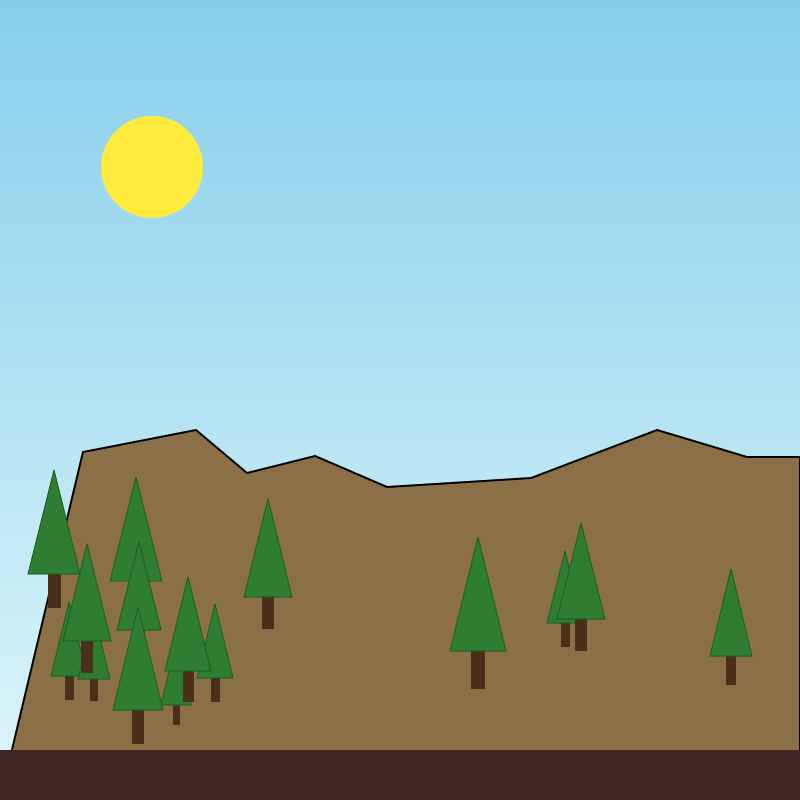

SVG saved as competition.svg


In [6]:
import random
from IPython.display import SVG, display

# SVG header
svg_width, svg_height = 800, 800
svg = f'<svg width="{svg_width}" height="{svg_height}" xmlns="http://www.w3.org/2000/svg">\n'

# Sky with gradient
svg += '<defs>\n'
svg += '<linearGradient id="skyGradient" x1="0%" y1="0%" x2="0%" y2="100%">\n'
svg += '<stop offset="0%" style="stop-color:#87ceeb;stop-opacity:1"/>\n'
svg += '<stop offset="100%" style="stop-color:#e0f7fa;stop-opacity:1"/>\n'
svg += '</linearGradient>\n'
svg += '</defs>\n'
svg += f'<rect width="{svg_width}" height="{svg_height}" fill="url(#skyGradient)"/>\n'

# Sun
sun_radius = random.randint(40, 60)
sun_x = random.randint(100, 700)
sun_y = random.randint(50, 200)
svg += f'<circle cx="{sun_x}" cy="{sun_y}" r="{sun_radius}" fill="#ffeb3b"/>\n'

# Mountains (3 layers for depth)
for layer in range(3):
    points = []
    x = 0
    y = svg_height - (100 + layer * 100)  # Lower layers closer to bottom
    points.append(f"0,{svg_height}")  # Start at bottom-left
    while x < svg_width:
        x += random.randint(50, 150)  # Random segment width
        if x > svg_width:
            x = svg_width
        y_variation = random.randint(-50, 50) if x < svg_width else 0
        y_new = y + y_variation
        if y_new > svg_height - 50:
            y_new = svg_height - 50
        elif y_new < svg_height - 300 - layer * 100:
            y_new = svg_height - 300 - layer * 100
        points.append(f"{x},{y_new}")
        y = y_new
    points.append(f"{svg_width},{svg_height}")  # End at bottom-right
    color = ["#4b2e1a", "#6b4e31", "#8b6f47"][layer]  # Darker to lighter
    svg += f'<polygon points="{" ".join(points)}" fill="{color}" stroke="#000000" stroke-width="2"/>\n'

# Trees (15 scattered trees)
for _ in range(15):
    tree_x = random.randint(50, 750)
    tree_y = random.randint(svg_height - 200, svg_height - 50)
    tree_height = random.randint(60, 120)
    tree_width = tree_height // 2
    trunk_width = tree_width // 4
    trunk_height = tree_height // 3
    # Trunk
    svg += f'<rect x="{tree_x - trunk_width // 2}" y="{tree_y - trunk_height}" width="{trunk_width}" height="{trunk_height}" fill="#4a2f1a"/>\n'
    # Foliage (triangle)
    foliage_points = [
        f"{tree_x},{tree_y - trunk_height - tree_height}",
        f"{tree_x - tree_width // 2},{tree_y - trunk_height}",
        f"{tree_x + tree_width // 2},{tree_y - trunk_height}"
    ]
    svg += f'<polygon points="{" ".join(foliage_points)}" fill="#2e7d32" stroke="#1b5e20" stroke-width="1"/>\n'

# Ground
svg += f'<rect x="0" y="{svg_height - 50}" width="{svg_width}" height="50" fill="#3e2723"/>\n'

# Close SVG
svg += '</svg>'

# Save SVG in the same directory
with open("competition.svg", "w") as f:
    f.write(svg)

# Display SVG in Jupyter
display(SVG(filename="competition.svg"))
print("SVG saved as competition.svg")